### import packeges

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the Data

In [13]:
df = pd.read_csv('Time-series-Dataset/Behzad_01_training.csv')

In [14]:
df.head()

,1900,5.75x,53.25x,2.4x,2.5x,2.4x.1,7.0x,10.9x,16.2x,18.4x,16.6x,14.5x,NA,6.0x,5.1x
0,1900,5.75x,52.75x,2.6x,1.1x,2.4x,7.5x,11.7x,16.7x,18.9x,17.0x,15.1x,10.8x,6.6x,6.1x
1,1900,5.75x,52.25x,3.2x,1.8x,3.1x,7.7x,11.8x,16.6x,19.0x,16.9x,14.8x,10.7x,6.4x,5.9x
2,1900,5.75x,51.75x,3.5x,3.0x,3.3x,7.9x,12.1x,16.5x,19.2x,16.7x,14.5x,10.3x,5.9x,5.6x
3,1900,5.75x,51.25x,4.4x,4.0x,4.0x,8.9x,12.6x,17.2x,19.8x,16.8x,15.0x,10.7x,7.2x,6.2x
4,1900,5.75x,50.75x,4.4x,3.7x,3.7x,8.2x,12.5x,16.7x,19.6x,16.5x,14.9x,10.3x,6.3x,5.5x


In [15]:
# set column and index for the data 
df.columns = range(0, 15)

In [16]:
df.index

RangeIndex(start=0, stop=31977, step=1)

In [17]:
df.columns

RangeIndex(start=0, stop=15, step=1)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1900,5.75x,52.75x,2.6x,1.1x,2.4x,7.5x,11.7x,16.7x,18.9x,17.0x,15.1x,10.8x,6.6x,6.1x
1,1900,5.75x,52.25x,3.2x,1.8x,3.1x,7.7x,11.8x,16.6x,19.0x,16.9x,14.8x,10.7x,6.4x,5.9x
2,1900,5.75x,51.75x,3.5x,3.0x,3.3x,7.9x,12.1x,16.5x,19.2x,16.7x,14.5x,10.3x,5.9x,5.6x
3,1900,5.75x,51.25x,4.4x,4.0x,4.0x,8.9x,12.6x,17.2x,19.8x,16.8x,15.0x,10.7x,7.2x,6.2x
4,1900,5.75x,50.75x,4.4x,3.7x,3.7x,8.2x,12.5x,16.7x,19.6x,16.5x,14.9x,10.3x,6.3x,5.5x


### Data cleaning 

- checking the type of featurs
- deleting unnecessary values
- convert the 'year' column into Datatime



In [19]:
# check the type of datas
df.dtypes

0      int64
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
dtype: object

In [20]:
#deleting 'x' 
df = df.replace('x', '', regex=True)

In [21]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1900,5.75,52.75,2.6,1.1,2.4,7.5,11.7,16.7,18.9,17.0,15.1,10.8,6.6,6.1


In [22]:
# convert the types into float
for col in df.columns[1:]:
    df[col] = df[col].astype(float)

In [23]:
df.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
dtype: object

In [24]:
#convert the 'year' column into Datatime
df[0] = pd.to_datetime(df[0], format='%Y')

In [25]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1900-01-01,5.75,52.75,2.6,1.1,2.4,7.5,11.7,16.7,18.9,17.0,15.1,10.8,6.6,6.1
1,1900-01-01,5.75,52.25,3.2,1.8,3.1,7.7,11.8,16.6,19.0,16.9,14.8,10.7,6.4,5.9
2,1900-01-01,5.75,51.75,3.5,3.0,3.3,7.9,12.1,16.5,19.2,16.7,14.5,10.3,5.9,5.6
3,1900-01-01,5.75,51.25,4.4,4.0,4.0,8.9,12.6,17.2,19.8,16.8,15.0,10.7,7.2,6.2
4,1900-01-01,5.75,50.75,4.4,3.7,3.7,8.2,12.5,16.7,19.6,16.5,14.9,10.3,6.3,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31972,2017-01-01,14.75,49.25,-6.0,1.0,5.9,6.3,13.7,18.3,18.6,18.4,11.7,9.6,3.3,0.4
31973,2017-01-01,14.75,48.75,-5.9,1.3,6.2,6.8,13.6,18.6,18.8,19.1,11.7,9.7,3.4,-0.3
31974,2017-01-01,14.75,48.25,-4.5,2.0,7.2,7.9,14.9,19.6,19.4,19.6,12.9,10.5,3.9,0.9
31975,2017-01-01,14.75,47.75,-7.5,-0.2,4.6,5.2,11.8,16.5,16.3,16.6,9.6,7.6,1.3,-1.9


### Date problem

the problem here we have is that, we have same values for Datetime column, so we need to make an iteration in order to make the dates reasonably
 - to do this task we need to do explore in date column

In [26]:
# checking the same valuse for some random dates
print(np.sum(df[0]=='1900-01-01'))
print(np.sum(df[0]=='1901-01-01'))
print(np.sum(df[0]=='1904-01-01'))
print(np.sum(df[0]=='1903-01-01'))
print(np.sum(df[0]=='2013-01-01'))
print(np.sum(df[0]=='2017-01-01'))
print(np.sum(df[0]=='2011-01-01'))

270
271
271
271
271
271
271


- we can see that Except for '1900' which has 270 values, the rest of the years until '2017' have 271 values.
For financial datasets, the number of values (data points) each year can vary depending on several factors, There can be several reasons for this:
    - Trading Days: In financial markets, the number of trading days in a year can vary depending on holidays and weekends. Typically, there are around 252 to 253 trading days in a year for most stock exchanges. However, this number can be slightly different for different markets and regions.
    - Business or Environmental Factors: Depending on the nature of the data, there could be certain business or environmental factors that lead to this pattern. For example, if the data is related to sales, there might be 270 business days in a year, excluding weekends and holidays.
    - Data Frequency:  The data might be sampled or recorded at regular intervals, such as daily, weekly, or monthly. If there are 270 data points per year, it suggests that the data might be sampled daily or approximately every 1.35 days.

In [27]:
# set the date as an index of datasetf
df.set_index(df.columns[0], inplace=True)

In [28]:
# rename the index into "Date"
df = df.rename_axis('Date')

In [29]:
df.head(1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Date,,,,,,,,,,,,,,
1900-01-01,5.75,52.75,2.6,1.1,2.4,7.5,11.7,16.7,18.9,17.0,15.1,10.8,6.6,6.1


In [30]:
# the first date of data
df.index.min()

Timestamp('1900-01-01 00:00:00')

In [31]:
# the last year of the data
df.index.max()

Timestamp('2017-01-01 00:00:00')

##### The important thing is that we have to add 271 days to the last date that we have, so that you finally get the exact date

In [32]:
# Define the initial date
initial_date = pd.to_datetime('2017-01-01')

# Define the duration (271 days)
duration = pd.Timedelta(days=271)

# Calculate the date after 271 days
date_after_271_days = initial_date + duration

In [33]:
date_after_271_days

Timestamp('2017-09-29 00:00:00')

In [34]:
# Create a date range starting from the first date index to the last date
date_range = pd.date_range(start=df.index.min(), end=date_after_271_days, periods=31977)

In [35]:
# Assign the new date range as the index of our DataFrame
df.index = date_range

In [36]:
# rename the index into "Date"
df = df.rename_axis('Date')

In [37]:
df.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Date,,,,,,,,,,,,,,
1900-01-01 00:00:00.000000000,5.75,52.75,2.6,1.1,2.4,7.5,11.7,16.7,18.9,17.0,15.1,10.8,6.6,6.1
1900-01-02 08:16:40.650487865,5.75,52.25,3.2,1.8,3.1,7.7,11.8,16.6,19.0,16.9,14.8,10.7,6.4,5.9


In [38]:
# removing time from Date index
df.index = pd.to_datetime(df.index).normalize()

In [45]:
print(np.sum(df.index=='2017-09-29'))
print(np.sum(df.index=='2012-09-29'))
print(np.sum(df.index=='2013-09-29'))
print(np.sum(df.index=='2010-09-29'))

1
1
1
1


In [46]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Date,,,,,,,,,,,,,,
1900-01-01,5.75,52.75,2.6,1.1,2.4,7.5,11.7,16.7,18.9,17.0,15.1,10.8,6.6,6.1
1900-01-02,5.75,52.25,3.2,1.8,3.1,7.7,11.8,16.6,19.0,16.9,14.8,10.7,6.4,5.9
1900-01-03,5.75,51.75,3.5,3.0,3.3,7.9,12.1,16.5,19.2,16.7,14.5,10.3,5.9,5.6
1900-01-05,5.75,51.25,4.4,4.0,4.0,8.9,12.6,17.2,19.8,16.8,15.0,10.7,7.2,6.2
1900-01-06,5.75,50.75,4.4,3.7,3.7,8.2,12.5,16.7,19.6,16.5,14.9,10.3,6.3,5.5


### Missing Values

 it's time to Look for any missing values in the dataset:

In [47]:
# check for missing values
df.isnull().sum()

1        0
2        0
3      956
4      986
5     1033
6      961
7     1019
8      987
9      996
10     968
11     967
12     984
13    1024
14     951
dtype: int64

In [48]:
#!pip install missingno
import missingno as msno
%matplotlib inline

<Axes: >

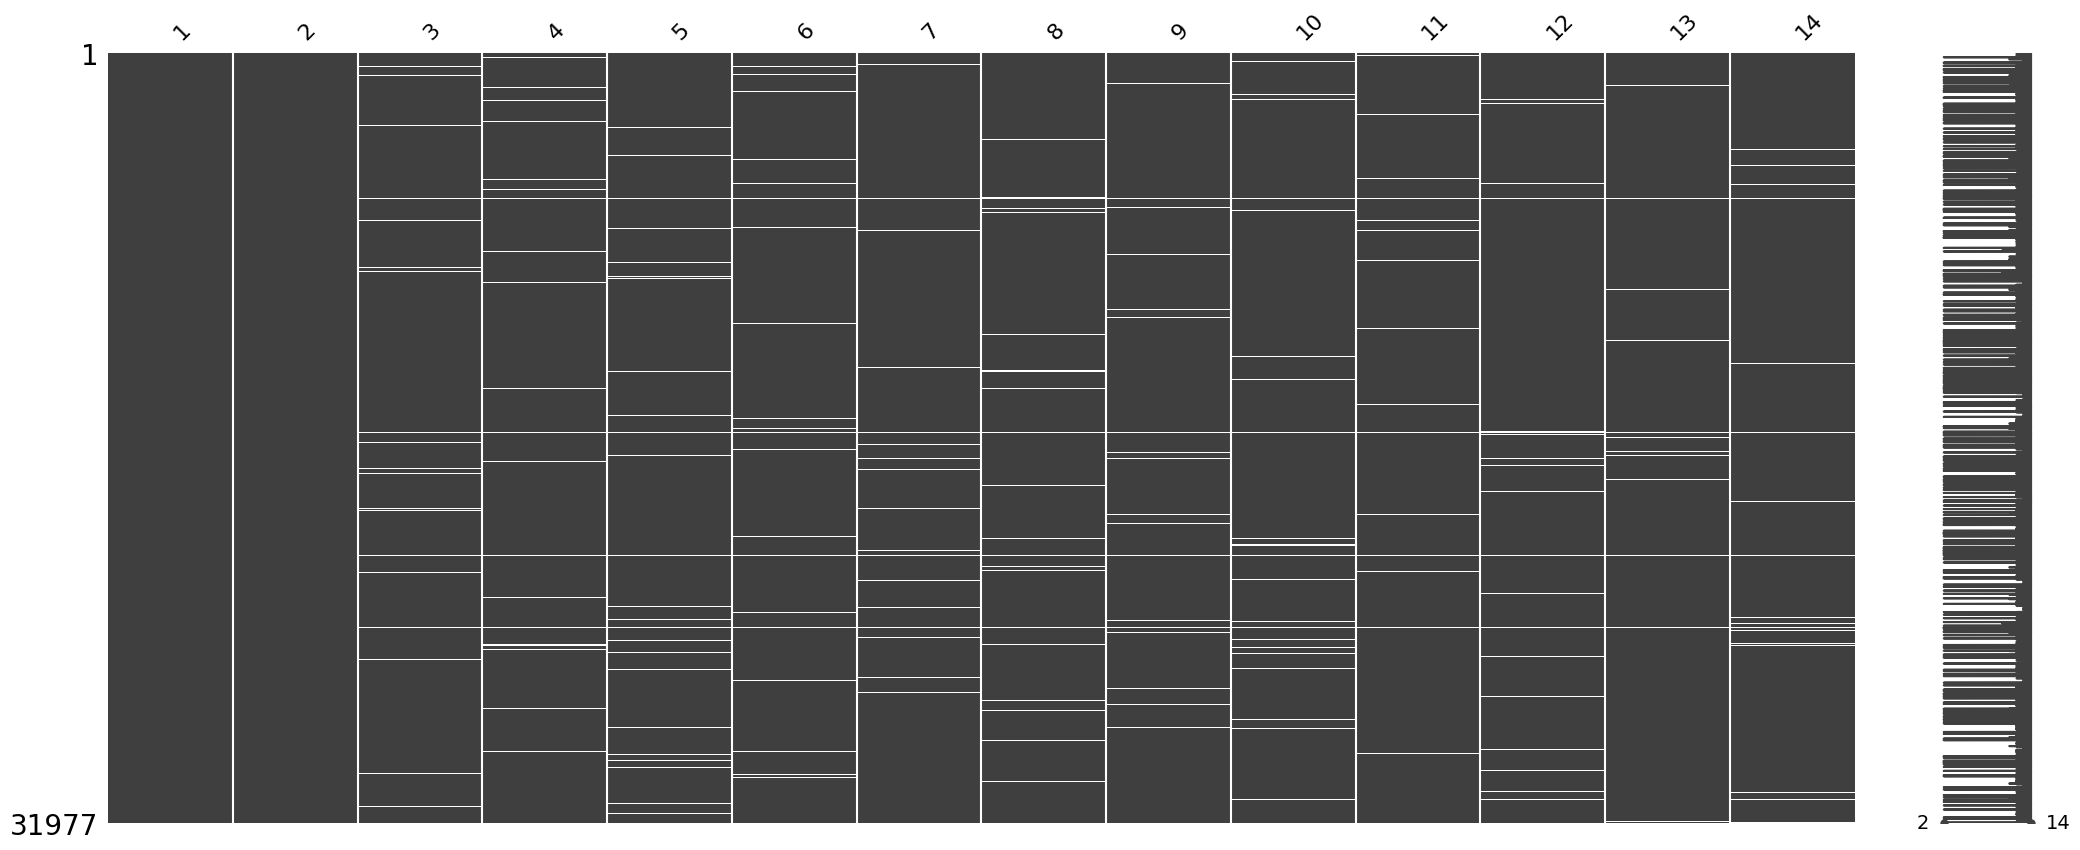

In [49]:
#visulize missing values
msno.matrix(df)

> feature 1 and 2 has no missing values but other featues have plenty of missing values

In [50]:
df.corr()[[3]].style.background_gradient(cmap='coolwarm')

,3
1,-0.333770
2,0.275181
3,1.000000
4,0.542014
5,0.445458
6,0.354498
7,0.287436
8,0.174174
9,0.255911
10,0.358892


> there is a good correlation between feature '3', '4' and '5' so let's dive deeper

In [51]:
# Rename column names to use the features of string column
df.rename(columns={1: 'one', 2:'two', 3: 'three', 4:'four',
                   5:'five', 6:'six', 7:'seven', 8:'eight',
                   9:'nine',10:'ten', 11:'eleven', 12:'twelve',
                   13:'thirteen', 14:'fourteen'}, inplace=True)

In [52]:
df.columns

Index(['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine',
       'ten', 'eleven', 'twelve', 'thirteen', 'fourteen'],
      dtype='object')

> the task here is to fill the null values of features:

   - column 'three' is the target column. Here are some common strategies for filling null values:
       - Mean/Median/Mode Imputation
       - Interpolation
       - Predictive Models
       - Custom Functions or Business Logic and others

We measure the values with respect

In [67]:
# NOT THIS 
#df['three_new'] = df['three'].fillna(df.groupby(['four', 'five'])['three'].transform('mean'))
#df['four_new'] = df['four'].fillna(df.groupby(['three', 'five'])['four'].transform('mean'))
#df['five_new'] = df['five'].fillna(df.groupby(['four', 'three'])['five'].transform('mean'))


In [79]:
# Forward fill (THIS ONE WORKS)
df['three_new'] = df['three'].ffill()

In [80]:
df

,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,three_new,four_new,five_new
Date,,,,,,,,,,,,,,,,,
1900-01-01,5.75,52.75,2.6,1.1,2.4,7.5,11.7,16.7,18.9,17.0,15.1,10.8,6.6,6.1,2.6,1.1,2.4
1900-01-02,5.75,52.25,3.2,1.8,3.1,7.7,11.8,16.6,19.0,16.9,14.8,10.7,6.4,5.9,3.2,1.8,3.1
1900-01-03,5.75,51.75,3.5,3.0,3.3,7.9,12.1,16.5,19.2,16.7,14.5,10.3,5.9,5.6,3.5,3.0,3.3
1900-01-05,5.75,51.25,4.4,4.0,4.0,8.9,12.6,17.2,19.8,16.8,15.0,10.7,7.2,6.2,4.4,4.0,4.0
1900-01-06,5.75,50.75,4.4,3.7,3.7,8.2,12.5,16.7,19.6,16.5,14.9,10.3,6.3,5.5,4.4,3.7,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-23,14.75,49.25,-6.0,1.0,5.9,6.3,13.7,18.3,18.6,18.4,11.7,9.6,3.3,0.4,-6.0,1.0,5.9
2017-09-24,14.75,48.75,-5.9,1.3,6.2,6.8,13.6,18.6,18.8,19.1,11.7,9.7,3.4,-0.3,-5.9,1.3,6.2
2017-09-26,14.75,48.25,-4.5,2.0,7.2,7.9,14.9,19.6,19.4,19.6,12.9,10.5,3.9,0.9,-4.5,2.0,7.2


In [70]:
df.isnull().sum()

one             0
two             0
three         956
four          986
five         1033
six           961
seven        1019
eight         987
nine          996
ten           968
eleven        967
twelve        984
thirteen     1024
fourteen      951
three_new       0
four_new      449
five_new      481
dtype: int64

In [66]:
df.corr()[['four']].style.background_gradient(cmap='coolwarm')

,four
one,-0.298166
two,0.182962
three,0.542014
four,1.000000
five,0.547131
six,0.432116
seven,0.271919
eight,0.267820
nine,0.265627
ten,0.323012


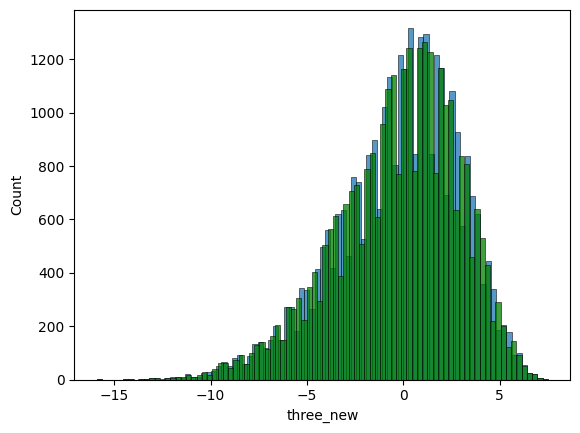

In [78]:
ax = sns.histplot(df.three_new)
ax = sns.histplot(df.three, ax=ax, color='g', label='three')

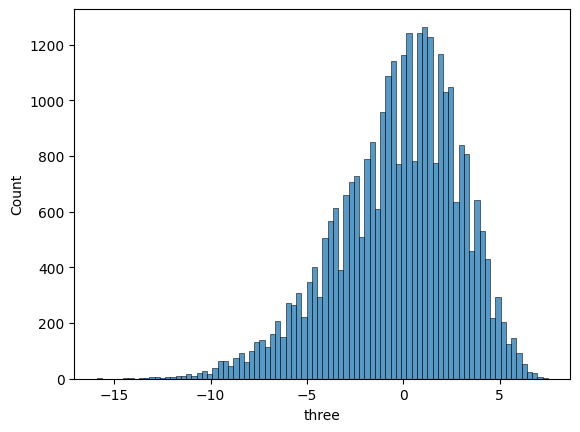

In [74]:
ax = sns.histplot(df.three)

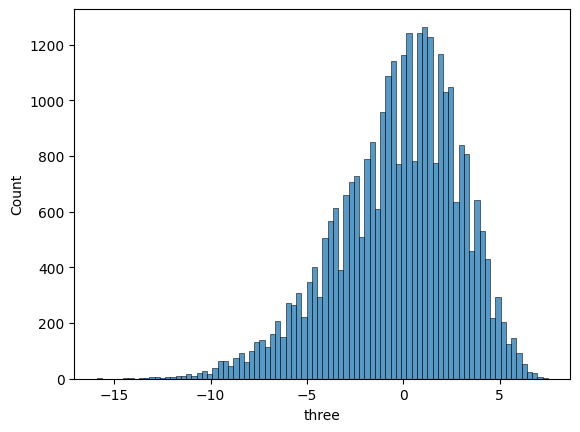

In [75]:
ax = sns.histplot(df.three)

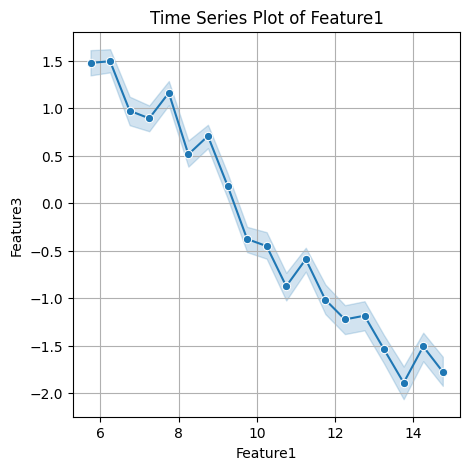

In [84]:

# Visualization
plt.figure(figsize=(5, 5))
sns.lineplot(data=df, x=df['one'], y=df['three_new'], marker='o')
plt.title('Time Series Plot of Feature1')
plt.xlabel('Feature1')
plt.ylabel('Feature3')
plt.grid(True)
plt.show()

# Exploratory Data Analysis
# Summary statistics
#print(df.describe())

# Correlation heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Heatmap')
#plt.show()


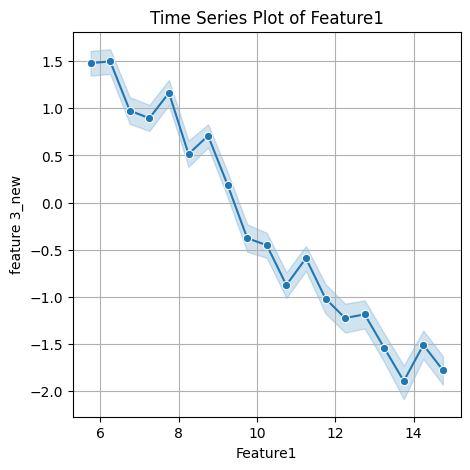

In [85]:
plt.figure(figsize=(5, 5))
sns.lineplot(data=df, x=df['one'], y=df['three_new'], marker='o')
plt.title('Time Series Plot of Feature1')
plt.xlabel('Feature1')
plt.ylabel('feature 3_new')
plt.grid(True)
plt.show()